## Question4.5

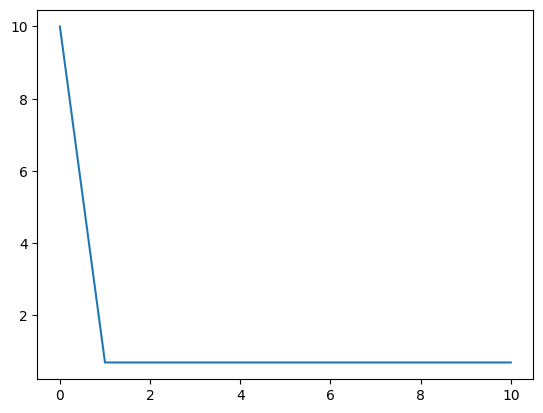

In [7]:
from autograd import grad
from autograd import hessian
import matplotlib.pyplot as plt
from autograd import numpy as np

def g(w):
    return np.log(1+np.exp(np.dot(w.T, w)))

def newton_method(g, max_its, w, **kwargs):
    gradient = grad(g)
    hess = hessian(g)
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']
    weight_history = [w]
    cost_history = [g(w)]
    for k in range(max_its):
        grad_eval = gradient(w)
        hess_eval = hess(w)
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)), int((np.size(hess_eval))**(0.5)))
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A, np.dot(A, w) - b)
        weight_history.append(w)
        cost_history.append(g(w))
    cost_history = [np.squeeze(val) for val in cost_history]
    return weight_history, cost_history

N = 10
w0 = np.ones((N, 1))
weights, cost_history = newton_method(g, 10, w0)
plt.plot(cost_history)
plt.show()



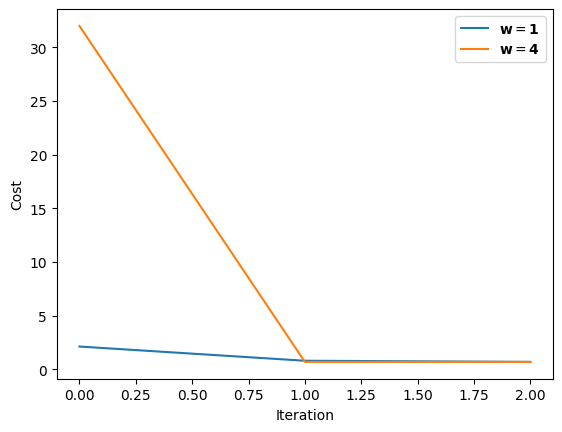

In [16]:
import matplotlib.pyplot as plt

def plot_cost_histories(cost_histories, labels, start=0, points=False):
    for cost_history, label in zip(cost_histories, labels):
        if points:
            plt.scatter(range(start, len(cost_history)), cost_history[start:], label=label)
        else:
            plt.plot(range(start, len(cost_history)), cost_history[start:], label=label)
    
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()


w = np.ones((2,))
max_its = 2
weight_history, cost_history = newtons_method(g, max_its, w)

w = 4 * np.ones((2,))
max_its = 2
weight_history_2, cost_history_2 = newtons_method(g, max_its, w)


plot_cost_histories([cost_history, cost_history_2], labels=[r'$\mathbf{w}=\mathbf{1}$', r'$\mathbf{w}=\mathbf{4}$'])
